In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold , cross_val_score, GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import graphviz

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")
df.shape

(120, 7)

In [4]:
df.head().T

,0,1,2,3,4
technology actor,1.0,1.0,1.0,1.0,1.0
administrative actor,1.0,1.0,1.0,1.0,1.0
economic actor,1.0,1.0,2.0,2.0,5.0
technical actor,1.0,1.0,1.0,1.0,1.0
political-social actor,1.0,1.0,1.0,1.0,1.0
AIS,110.0,110.0,110.2,110.2,110.8
AIS-grade,1.0,1.0,1.0,1.0,1.0


In [6]:
df.drop(["AIS"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
technology actor,1,1,1,1,1
administrative actor,1,1,1,1,1
economic actor,1,1,2,2,5
technical actor,1,1,1,1,1
political-social actor,1,1,1,1,1
AIS-grade,1,1,1,1,1


In [7]:
X = df.drop("AIS-grade", axis = 1)
y = df["AIS-grade"]

In [8]:
X.shape

(120, 5)

In [9]:
y.shape

(120,)

In [10]:
X.head()

,technology actor,administrative actor,economic actor,technical actor,political-social actor
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,2,1,1
3,1,1,2,1,1
4,1,1,5,1,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 5), (90,), (30, 5), (30,))

In [12]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

model= xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[5 1 0 0 0]
 [1 0 0 0 0]
 [0 0 7 4 0]
 [0 0 1 9 0]
 [0 0 0 0 2]]
0.7666666666666667


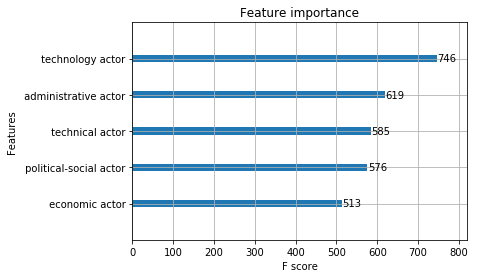

In [14]:
model_importances = XGBClassifier(n_estimators=200)
model_importances.fit(X_train, y_train)
plot_importance(model_importances)
plt.show()